In [1]:
# Importamos librerías de análisis de datos
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
data = pd.read_csv("DataForWordCloud.csv")
data["descripcion"] = data["descripcion"].astype('str')

In [3]:
data.columns

Index(['Unnamed: 0', 'id', 'titulo', 'descripcion', 'tipodepropiedad',
       'direccion', 'ciudad', 'provincia', 'antiguedad', 'habitaciones',
       'garages', 'banos', 'metroscubiertos', 'metrostotales', 'idzona', 'lat',
       'lng', 'fecha', 'gimnasio', 'usosmultiples', 'piscina',
       'escuelascercanas', 'centroscomercialescercanos', 'precio', 'anio',
       'mes', 'categoria_padre'],
      dtype='object')

In [9]:
data["categoria_padre"].value_counts()

vivienda     219575
inversion     12455
comercial      7893
undefined        77
Name: categoria_padre, dtype: int64

In [40]:
vivienda = data[data["categoria_padre"] == "vivienda"]

In [25]:
import spacy
nlp = spacy.load("es")

def normalize(text):
    doc = nlp(text)
    #eliminacion de palabras comunes en el vocabulario español (conjunciones, preposiciones y verbos comunes)
    words = [t.orth_ for t in doc if not t.is_punct | t.is_stop]
    #se descartan palabras muy cortas
    lexical_tokens = [t.lower() for t in words if len(t) > 3 and t.isalpha()]
    return lexical_tokens

word_list = normalize("“Soy un texto de prueba. ¿Cuántos tokens me quedarán después de la normalización?”")

In [26]:
print(word_list)

['texto', 'prueba', 'tokens', 'quedarán', 'normalización']


In [43]:
vivienda_text = []

In [44]:
for descripcion in vivienda["descripcion"]:
    vivienda_text.extend(normalize(descripcion))

In [46]:
print ("Hay {} palabras en la combinacion de descripciones para la categoria {}.".format(len(vivienda_text),"vivienda"))

Hay 7453678 palabras en la combinacion de descripciones para la categoria vivienda.


In [52]:
text = " ".join(word for word in vivienda_text)

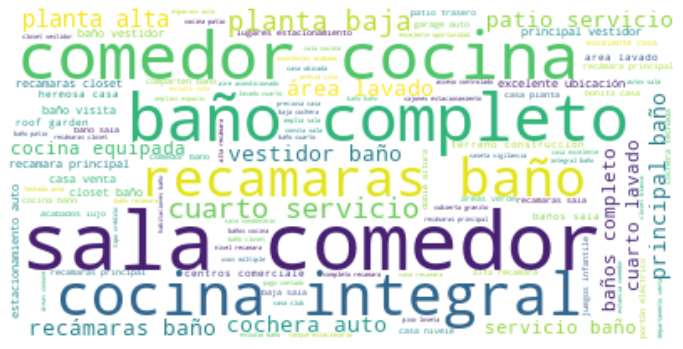

In [53]:
# Create stopword list:
#stopwords = set(STOPWORDS)
#stopwords.update(["casa", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Inversion

In [54]:
inversion = data[data["categoria_padre"] == "inversion"]

In [55]:
inversion_text = []

In [56]:
for descripcion in inversion["descripcion"]:
    inversion_text.extend(normalize(descripcion))

In [57]:
print ("Hay {} palabras en la combinacion de descripciones para la categoria {}.".format(len(inversion_text),"inversion"))

Hay 267116 palabras en la combinacion de descripciones para la categoria inversion.


In [58]:
text_inversion = " ".join(word for word in inversion_text)

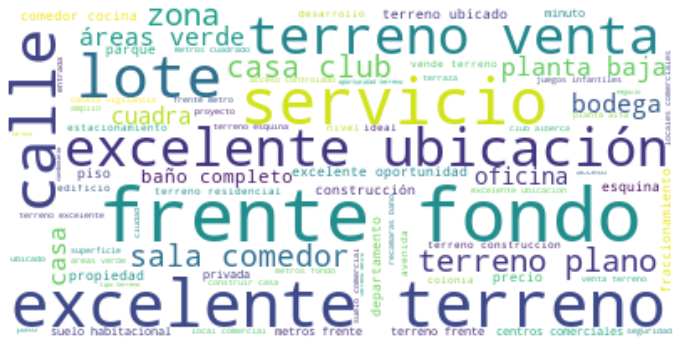

In [60]:
# Create stopword list:
#stopwords = set(STOPWORDS)
#stopwords.update(["casa", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text_inversion)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Comercial

In [61]:
comercial = data[data["categoria_padre"] == "comercial"]

In [62]:
comercial_text = []

In [63]:
for descripcion in comercial["descripcion"]:
    comercial_text.extend(normalize(descripcion))

In [64]:
print ("Hay {} palabras en la combinacion de descripciones para la categoria {}.".format(len(comercial_text),"comercial"))

Hay 190153 palabras en la combinacion de descripciones para la categoria comercial.


In [65]:
text_comercial = " ".join(word for word in comercial_text)

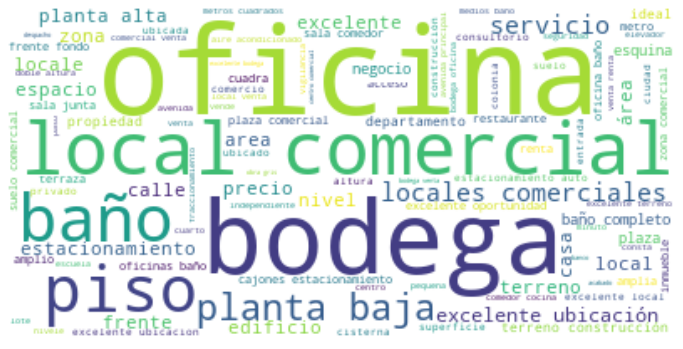

In [66]:
# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text_comercial)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()